In [1]:
import numpy as np
import pandas as pd
import scipy

# Data visualization tools
import matplotlib.pyplot as plt
## include your matplotlib graphs in your notebook, next to the code
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

# Scikit-learn K-means clustering implementation
from sklearn.cluster import KMeans

# Mini Case Study: Clustering Car Models
* **mpg**: how many miles per gallon this car model gets
* **cylinders**: number of cylinders in the engine of the car
* **displacement**: a rough measure of the size of the car
* **horsepower**: a rough measure of how powerful the car's engine is
* **weight**: the weight of the car
* **acceleration**: how quickly this car model is able to accelerate
* **model_year**: the year this car model was released on the market
* **origin**: a categorical code for what country this car's manufacturer is from
<br></br>

## Load and prepare the data

In [4]:
!wget http://lib.stat.cmu.edu/datasets/cars.data
!sh cars.data

zsh:1: command not found: wget
sh: cars.data: No such file or directory


In [35]:
column_name = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
raw_df = pd.read_csv('cars.data', header = None, names = column_name, sep=r'\s+')

In [36]:
# take a look at the dataset
raw_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [37]:
del raw_df['cylinders']
del raw_df['model_year']
del raw_df['origin']

In [38]:
raw_df = raw_df.dropna()

In [39]:
raw_df

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
401,27.0,140.0,86.0,2790.0,15.6
402,44.0,97.0,52.0,2130.0,24.6
403,32.0,135.0,84.0,2295.0,11.6
404,28.0,120.0,79.0,2625.0,18.6


In [40]:
# Standardize the data to have a mean of 0 and a variance of 1
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(raw_df)

In [41]:
# take a look at the standardized array
pd.DataFrame(X_std)

,0,1,2,3,4
0,-0.698638,1.077290,0.664133,0.620540,-1.285258
1,-1.083498,1.488732,1.574594,0.843334,-1.466724
2,-0.698638,1.182542,1.184397,0.540382,-1.648189
3,-0.955212,1.048584,1.184397,0.536845,-1.285258
4,-0.826925,1.029447,0.924265,0.555706,-1.829655
...,...,...,...,...,...
387,0.455941,-0.520637,-0.480448,-0.221125,0.021294
388,2.636813,-0.932079,-1.364896,-0.999134,3.287676
389,1.097374,-0.568479,-0.532474,-0.804632,-1.430430
390,0.584228,-0.712005,-0.662540,-0.415627,1.110088


## Visualize before K-Means

<Axes: xlabel='displacement', ylabel='horsepower'>

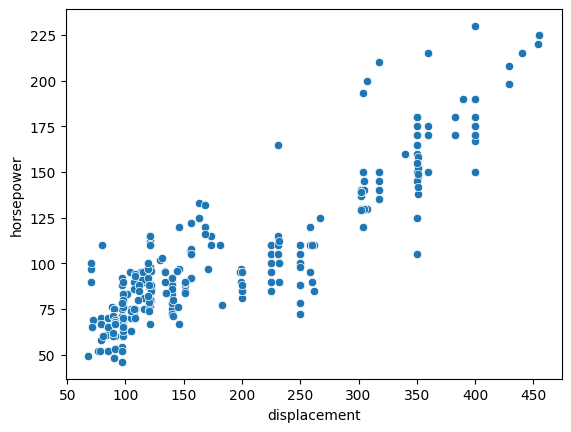

In [42]:
# let's take a look at the relationship between two of the variables
sns.scatterplot(x=raw_df['displacement'], y=raw_df['horsepower'])

# try to switch around different index numbers to see the relationship between any two variables

Alternatively, if you would like pairwise relationship across all variables, you can use the handy `pairplot` function from the `seaborn` library.

In [ ]:
# check pairwise relationship across all variables
# sns.pairplot(raw_df)

## Determining the Number of Clusters

In [43]:
# Fit k-means using the transformed data
wcss = []
ks = range(1,21)

for k in ks:
    # Create a KMeans instance with k clusters:
    kmeans = KMeans(n_clusters=k)

    # Fit model to samples
    kmeans.fit(X_std)

    # Append the wcss to a list
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

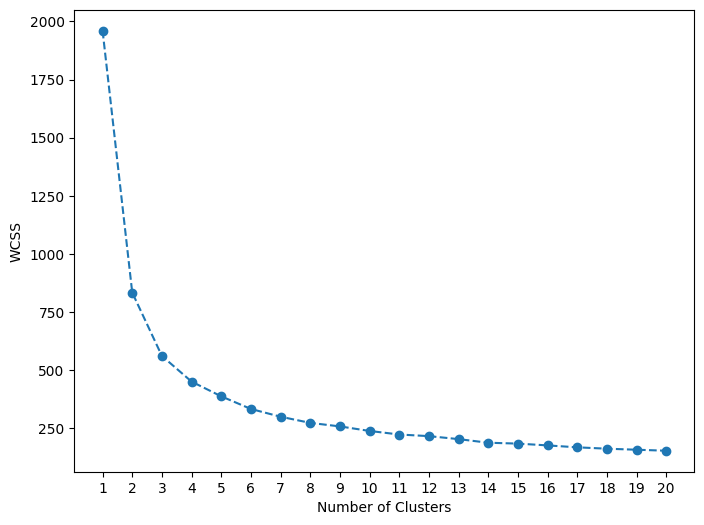

In [44]:
# plot the wcss against the number of components
plt.figure(figsize=(8,6))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')

plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 21, step=1))
plt.ylabel('WCSS')
plt.show()

In [45]:
# construct the final k-means model with our chosen number of clusters (k = 3)
kmeans = KMeans(n_clusters= 3)

In [46]:
# fit our data with the standardized data
kmeans.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
# take a look at the kmeans results
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,

Now, we have fit our final k-means model, let's get to the fun part -- it's time to analyze and interpret the results.

## Analyze the K-Means Clustering Results


In [53]:
# create a copy of the data frame, to which we will add the labels
df_kmeans = raw_df.copy()

In [54]:
# add in the k-means label as a new column
df_kmeans['Cluster'] = kmeans.labels_

In [55]:
# take a look at the new dataframe
# to examine feature values in each cluster
df_kmeans

,mpg,displacement,horsepower,weight,acceleration,Cluster
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1
...,...,...,...,...,...,...
401,27.0,140.0,86.0,2790.0,15.6,0
402,44.0,97.0,52.0,2130.0,24.6,2
403,32.0,135.0,84.0,2295.0,11.6,2
404,28.0,120.0,79.0,2625.0,18.6,2


## Visualize clusters after fitting K-Means

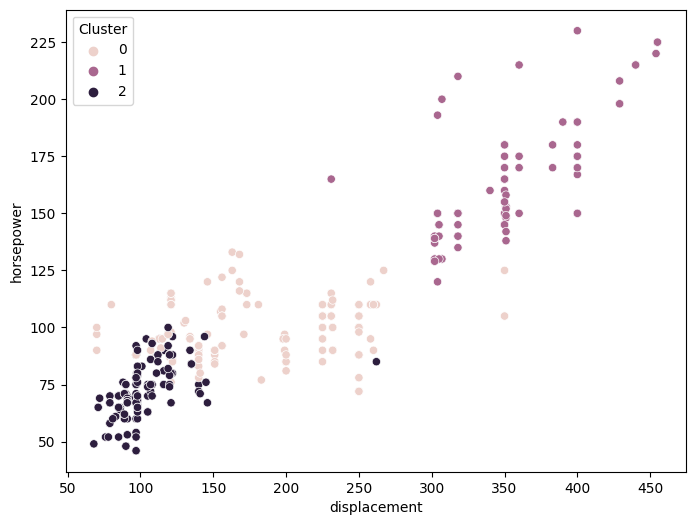

In [56]:
x_axis = df_kmeans['displacement']
y_axis = df_kmeans['horsepower']

plt.figure(figsize = (8,6))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_kmeans['Cluster'])
plt.show()

For those who are interested, you can also visualize your data in 3D graph.

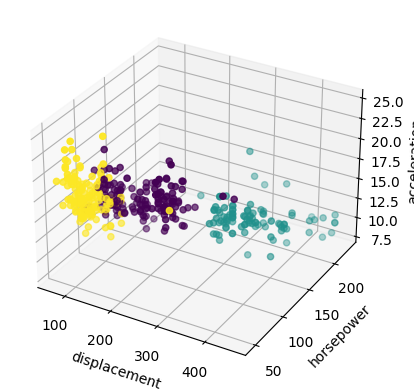

In [52]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_axis = df_kmeans['displacement']
y_axis = df_kmeans['horsepower']
z_axis = df_kmeans['acceleration']

ax.scatter(x_axis, y_axis, z_axis, c = df_kmeans['Cluster'])

ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('acceleration')

plt.show()
